In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file_path = '/content/tmdb_5000_movies.csv'
data = pd.read_csv(file_path)

In [3]:
numerical_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
numerical_data = data[numerical_columns]
imputer = SimpleImputer(strategy='median')
numerical_data_imputed = imputer.fit_transform(numerical_data)
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_imputed)

In [4]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
numerical_data_pca = pca.fit_transform(numerical_data_scaled)
numerical_data_shape = numerical_data.shape
numerical_data_example = numerical_data.iloc[:5]
resultant_data_shape = numerical_data_pca.shape
resultant_data_example = numerical_data_pca[:5]
print("Previous Data shape:", numerical_data_shape)
print("Previous Data example:\n", numerical_data_example)
print("New Data shape:", resultant_data_shape)
print("New Data example:\n", resultant_data_example)

Previous Data shape: (4803, 6)
Previous Data example:
       budget  popularity     revenue  runtime  vote_average  vote_count
0  237000000  150.437577  2787965087    162.0           7.2       11800
1  300000000  139.082615   961000000    169.0           6.9        4500
2  245000000  107.376788   880674609    148.0           6.3        4466
3  250000000  112.312950  1084939099    165.0           7.6        9106
4  260000000   43.926995   284139100    132.0           6.1        2124
New Data shape: (4803, 5)
New Data example:
 [[17.51978406 -4.08368977 -1.04622426 -1.80358319 -8.09399215]
 [ 9.58776604 -1.38984001 -2.65072992 -1.40830655  1.01705764]
 [ 7.94817718 -1.7567238  -2.03603846 -1.22330303  0.11050538]
 [11.00161111 -1.21500513 -1.26596972 -0.93946252 -1.80951616]
 [ 4.23268532 -1.21331013 -2.63363079 -2.27274292  2.05946935]]


In [5]:
explained_variance_ratio = pca.explained_variance_ratio_
pca_components = pca.components_

explained_variance_ratio, pca_components


(array([0.54420777, 0.19138384, 0.11902831, 0.07573418, 0.04299268]),
 array([[ 0.43054576,  0.45952546,  0.48967208,  0.2487862 ,  0.22616052,
          0.50064439],
        [-0.25432431, -0.09936081, -0.2204328 ,  0.61102325,  0.70309407,
         -0.09573544],
        [-0.40714789,  0.33535585, -0.06861894, -0.66036604,  0.48240731,
          0.21967787],
        [-0.53175922,  0.53863578, -0.21372337,  0.35379926, -0.46276601,
          0.20518201],
        [ 0.50869317,  0.52302897, -0.56595671, -0.05568138,  0.07826369,
         -0.37167102]]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

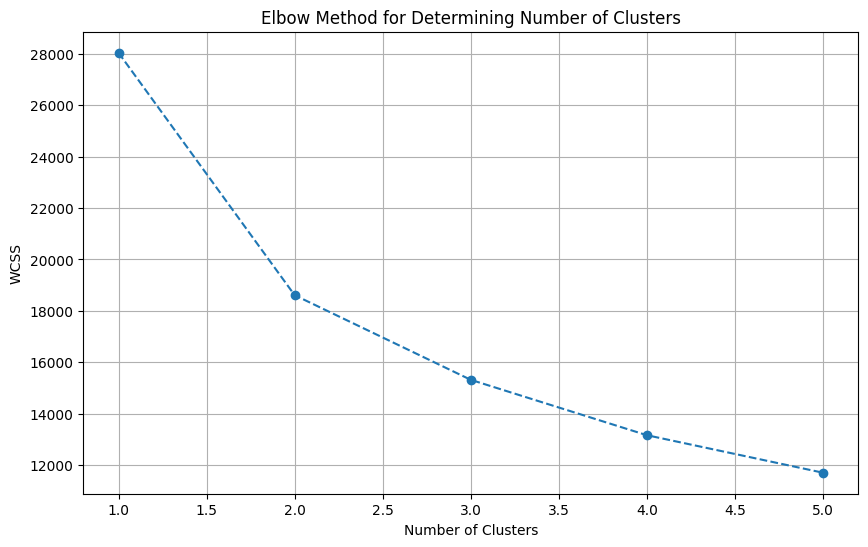

In [6]:
# Find optimal number of clusters using the elbow method
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numerical_data_pca)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


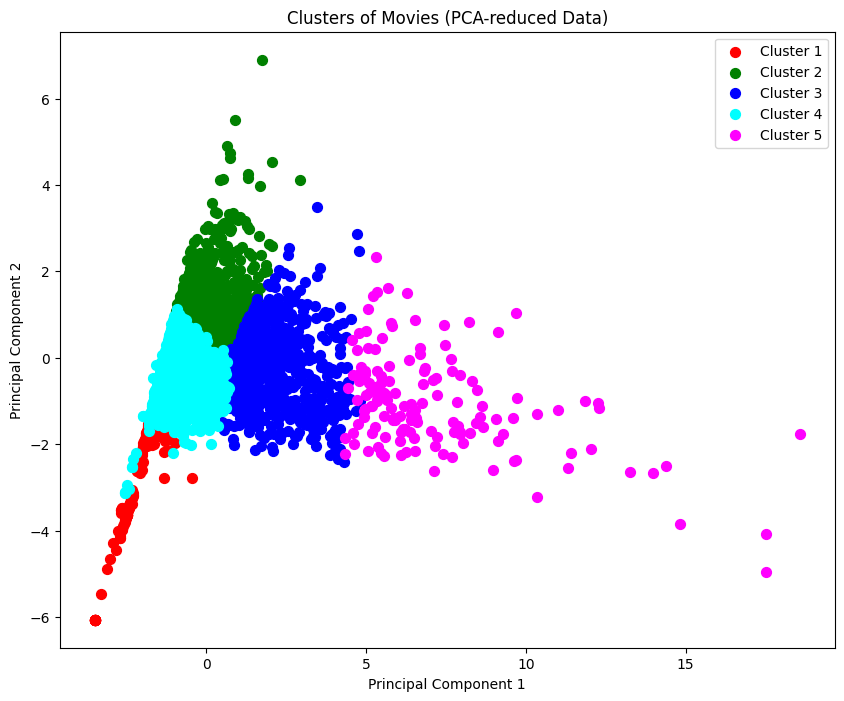

In [7]:
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans_final.fit_predict(numerical_data_pca)

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
for i in range(optimal_clusters):
    plt.scatter(numerical_data_pca[cluster_labels == i, 0], numerical_data_pca[cluster_labels == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')
plt.title('Clusters of Movies (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()